In [3]:
import pandas as pd

pd_data = pd.read_csv('./movie_raw_data.csv', index_col=0)
pd_data

,domain,target,text
0,00000.host,1,资源库-资源分享论坛 ...
1,00ysw.com,1,人人影视 - 在线免费高清电影！ ...
2,100161.com,1,最新免费在线电影-神马电影网-飘花影院-青苹果影院-6080-新视觉影院-策驰影院-神马影...
3,100fyy.net,1,免费电影_免费电视剧_免费动画片在线观看 - 100分影院 ...
4,1080p.site,1,1080p.site | 精选1080p电影在线观看 ...
...,...,...,...
2358,zsb.cucn.edu.cn,0,电影学(院线管理) ...
2359,zw.liuxue86.com,0,九月最值得期待的院线电影|电影评论 ...
2360,zxwz.xjcz.gov.cn,0,网站首页 ﻿ 设为首页 收藏本站 联系我们 网...
2361,zy3.xidian.edu.cn,0,挑灯寻影|阿竹影院首映场完美结束！精彩影评与下期预告同时奉上~-西安电子科技大学竹园...


In [4]:
import jieba

# 这段代码是把上面dataframe的text部分进行分词，然后转到列表里面去，方便进行tf-idf，结果可以看下面
all_text = []
for index in pd_data.index:
    item_text = []
    text = pd_data.iloc[index, 2]
    text = [i for i in text.split()]
    for i in text:
        for j in jieba.cut(i, cut_all=False):
            item_text.append(j)
    item_text = ' '.join(item_text)
    all_text.append(item_text)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\晚秋\AppData\Local\Temp\jieba.cache
Loading model cost 1.352 seconds.
Prefix dict has been built successfully.


In [5]:
all_text[:2]

['资源库 - 资源 分享 论坛 搜索 仅 搜索 标题 作者 ： 搜索 高级 搜索 ... 仅 搜索 标题 作者 ： 搜索 Advanced ... 登录 注册 搜索 仅 搜索 标题 作者 ： 搜索 高级 搜索 ... 仅 搜索 标题 作者 ： 搜索 Advanced ... Toggle sidebar Toggle sidebar 论坛 列表 菜单 安装 应用 安装 主页 论坛 新帖 搜索 论坛 最新消息 新帖 新 资源 个人 空间信息 最新 动态 下载 中心 最新 评论 搜索 资源 会员 当前 访客 个人 空间信息 搜索 个人 空间信息 资源 盘 Chat 捐 Welcome to our Community Wanting to join the rest of our members ? Feel free to sign up today . Sign up 禁用 JavaScript 。 为了 获得 更好 的 体验 ， 请 在 运行 之前 启用 浏览器 中 的 JavaScript 。 您 正在 使用 一款 已经 过时 的 浏览器 ！ 部分 功能 不能 正常 使用 。 请 尝试 升级 或 使用 其他 浏览器 。 用户 交流 求助 问答 ， 沟通 你 我 闲聊 灌水 新 20 56 主题 20 消息 56 关 论坛 那个 网盘 注册 送 1T ？ 星期一 ， 16 : 03 关键时刻 119 求助 问答 新 3 7 主题 3 消息 7 网站 建议 2022 / 02 / 10 yemo1408 影视 分享 热门 电影 新 154 197 主题 154 消息 197 Q 反贪 风暴 5 ( 2021 ) 昨天 11 : 09 q134182528 热门 剧集 新 141 150 主题 141 消息 150 Q 灵笼 16 分钟 以前 q134182528 寻觅 影视 新 3 8 主题 3 消息 8 扑 求 “ 不二 神探 ” 电影 ， 磁力 下 不了 ， 有没有 保存 了 的 兄弟 哦 2022 / 02 / 12 扑克 脸 软件 分享 电脑软件 新 47 72 主题 47 消息 72 Windows 微软 电脑 管家 内测 版 星期二 ， 23 : 00 admin 手机软件 新 29 69 主题 29 消息 69 TikTok - 去 广告 解除 封锁

In [6]:
MAX_FEATURES = 80
# 80 : 93.4%
# 90 : 93.2%

In [7]:
# print(all_text[0])

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=10, max_features=MAX_FEATURES)
X_tfidf = tfidf.fit_transform(all_text)
X_labels =X_tfidf.toarray() > 0
features = tfidf.get_feature_names_out()
for index in range(len(X_labels[0])):
    if X_labels[0][index] == True:
        print(features[index])

02
10
11
12
16
20
2021
2022
the
下载
分享
影视
最新
游戏
热门
电影
电视剧
网站
资源
软件


In [9]:
tfidf.get_feature_names_out()

array(['01', '02', '07', '08', '10', '1080p', '11', '12', '13', '14',
       '15', '16', '20', '2019', '2020', '2021', '2022', '22', '24', '25',
       '26', '27', '4k', 'com', 'hd', 'the', 'www', '一个', '下载', '世界',
       '中国', '中字', '主演', '免费', '公司', '分享', '剧情', '动作', '动漫', '可以', '喜剧',
       '国产', '在线', '大陆', '完结', '影片', '影视', '影院', '我们', '手机', '推荐', '提供',
       '播放', '新闻', '时间', '更新', '最新', '服务', '欧美', '游戏', '热门', '电影', '电影网',
       '电视剧', '第一季', '第二季', '类型', '综艺', '网站', '美国', '蓝光', '观看', '视频',
       '资源', '超清', '软件', '院线', '集全', '首页', '高清'], dtype=object)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(max_features=MAX_FEATURES)
X_count = count.fit_transform(all_text)
print(X_count.toarray())
print(len(X_count.toarray()))

[[0 2 0 ... 0 0 0]
 [0 0 0 ... 0 2 3]
 [0 0 2 ... 0 3 0]
 ...
 [4 1 5 ... 0 3 0]
 [0 0 0 ... 0 3 0]
 [5 0 0 ... 0 1 0]]
2363


In [11]:
count.get_feature_names_out()

array(['01', '02', '07', '08', '10', '1080p', '11', '12', '13', '14',
       '15', '16', '20', '2019', '2020', '2021', '2022', '22', '24', '25',
       '26', '27', '4k', 'com', 'hd', 'the', 'www', '一个', '下载', '世界',
       '中国', '中字', '主演', '免费', '公司', '分享', '剧情', '动作', '动漫', '可以', '喜剧',
       '国产', '在线', '大陆', '完结', '影片', '影视', '影院', '我们', '手机', '推荐', '提供',
       '播放', '新闻', '时间', '更新', '最新', '服务', '欧美', '游戏', '热门', '电影', '电影网',
       '电视剧', '第一季', '第二季', '类型', '综艺', '网站', '美国', '蓝光', '观看', '视频',
       '资源', '超清', '软件', '院线', '集全', '首页', '高清'], dtype=object)

In [12]:
from sklearn.model_selection import train_test_split

X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tfidf.toarray(), pd_data.target.values, test_size=0.2)
X_train_ct, X_test_ct, y_train_ct, y_test_ct = train_test_split(X_count.toarray(), pd_data.target.values, test_size=0.2)

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


def test_models(X_train, X_test, y_train, y_test):
    
#     if method == 'tfidf':
#         X_train = tfidf.transform(X_train)
#         X_test = tfidf.transform(X_test)
#     elif method == 'count':
#         X_train = count.transform(X_train)
#         X_test = count.transform(X_test)

    model1 = MultinomialNB()
    model1.fit(X_train, y_train)
    print('Naive_bayes: {:.2f} '.format(model1.score(X_test, y_test)))



    model2 = KNeighborsClassifier()
    model2.fit(X_train, y_train)
    print('kneighbors: {:.2f}'.format(model2.score(X_test, y_test)))


    model3 = LogisticRegression()
    model3.fit(X_train, y_train)
    print('LogisticRegression: {:.2f}'.format(model3.score(X_test, y_test)))


    model4 = RandomForestClassifier()
    model4.fit(X_train, y_train)
    print('RandomForest: {:.2f}'.format(model4.score(X_test, y_test)))


    model5 = DecisionTreeClassifier()
    model5.fit(X_train, y_train)
    print('DecisionTree: {:.2f}'.format(model5.score(X_test, y_test)))


    model6 = GradientBoostingClassifier()
    model6.fit(X_train, y_train)
    print('GradientBoost: {:.2f}'.format(model6.score(X_test, y_test)))


    model7 = SVC(kernel='rbf')
    model7.fit(X_train, y_train)
    print('SVM: {:.2f}'.format(model7.score(X_test, y_test)))
    
    
    model8 = XGBClassifier()
    model8.fit(X_train, y_train)
    print('xgboost: {:.2f}'.format(model8.score(X_test, y_test)))
    
    return model1, model2, model3, model4, model5, model6, model7, model8

D:\latefallsapp\Anaconda\envs\d2l\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [11]:
test_models(X_train_ct, X_test_ct, y_train_ct, y_test_ct)

Naive_bayes: 0.91 
kneighbors: 0.87
LogisticRegression: 0.92


D:\latefallsapp\Anaconda\envs\d2l\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForest: 0.94
DecisionTree: 0.89
GradientBoost: 0.94
SVM: 0.92


D:\latefallsapp\Anaconda\envs\d2l\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:26:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost: 0.95


(MultinomialNB(),
 KNeighborsClassifier(),
 LogisticRegression(),
 RandomForestClassifier(),
 DecisionTreeClassifier(),
 GradientBoostingClassifier(),
 SVC(),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=0.300000012,
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=1, predictor='auto', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None))

In [12]:
model1, _, model3, model4, _, model6, model7, model8 = test_models(X_train_tf, X_test_tf, y_train_tf, y_test_tf)

Naive_bayes: 0.92 
kneighbors: 0.91
LogisticRegression: 0.93
RandomForest: 0.94
DecisionTree: 0.90
GradientBoost: 0.94
SVM: 0.94
[15:26:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\latefallsapp\Anaconda\envs\d2l\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


xgboost: 0.94


In [32]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

models = []
# models.append(('naive_bayer', model1))
models.append(('LogisticRegression', model3))
models.append(('RandomForest', model4))
models.append(('GradientBoost', model6))
models.append(('XgBoost', model8))
# models.append(('SVM', model7))

vote = VotingClassifier(estimators=models, voting='soft')
vote.fit(X_train_tf, y_train_tf)
vote.score(X_test_tf, y_test_tf)


# for model, model_name in zip([model1, model3, model4, model6, model7, vote], ['naive_bayer', 'LogisticRegression', 'RandomForest', 'GradientBoost','SVM', 'vote']):
#     score = cross_val_score(model, X_count.toarray(), pd_data.target.values, scoring='accuracy')
#     print('{} accuracy: {}'.format(model_name, score))

D:\latefallsapp\Anaconda\envs\d2l\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:01:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.945031712473573

In [14]:
import requests
import numpy as np
from lxml import etree
import chardet

MAX_HREF_NUM = 1000

def predict_url(model, url):
    try:
        response = requests.get(url, timeout=5)
    except:
        return False
    response.encoding = response.apparent_encoding
    html = etree.HTML(response.text)
    if html is None:
        print('Request Failed')
        return False
#     html_data = html.xpath('//*[@href]/text()')  # 只选取“带有链接”的文本
    html_data = html.xpath('//*[name(.)!="style" and name(.)!="script"]/text()')
    if len(html_data) >= MAX_HREF_NUM:  # 只选取前多少个带有链接的文本
        html_data = html_data[:MAX_HREF_NUM]
        
    one_item = ''
    for item in html_data:
        item = item.strip()
        one_item += ' '
        one_item += item
    
    item_text = []
    text = [i for i in one_item.split()]
    for i in text:
        for j in jieba.cut(i, cut_all=False):
            item_text.append(j)
    item_text = ' '.join(item_text)
    out= []
    out.append(item_text)
    out = np.array(out).reshape(-1,)
    out_tf = tfidf.transform(out).toarray()
    result = model.predict(out_tf)[0]
    return int(result)
    
def predict_file(model, path):
    with open(path, 'rb') as f:
        results = f.read()
        code = chardet.detect(results)
        try:
            if code['encoding'] is None:
                results = results.decode('utf8')
            else:
                results = results.decode(code['encoding'])
        except UnicodeDecodeError:
            try:
                results = results.decode('GB18030')
            except UnicodeDecodeError:
                try:
                    results = results.decode('utf8', errors='ignore')
                except:
                    print('file: {}, code: {}'.format(file, code))
                    print('Not valid encode.')
                    return False
        html = etree.HTML(results)
        if html is None:
            print('Request Failed')
            return 0
#         html_data = html.xpath('//*[@href]/text()')
        html_data = html.xpath('//*[name(.)!="style" and name(.)!="script"]/text()')
        if len(html_data) >= MAX_HREF_NUM:  # 只选取前多少个带有链接的文本
            html_data = html_data[:MAX_HREF_NUM]
            
    one_item = ''
        
    for item in html_data:
        item = item.strip()
        one_item += ' '
        one_item += item
    
    item_text = []
    text = [i for i in one_item.split()]
    for i in text:
        for j in jieba.cut(i, cut_all=False):
            item_text.append(j)
    item_text = ' '.join(item_text)
    out= []
    out.append(item_text)
    out = np.array(out).reshape(-1,)
    out_tf = tfidf.transform(out).toarray()
    result = model.predict(out_tf)
    return int(result)

In [15]:
import os

wrong_postive = []

file_path_pms = '../splashHtmlCrawler/html/pms'
files_pms = os.listdir(file_path_pms)
num = 0
for index, file in enumerate(files_pms, 1):
    if index % 100 == 0:
        print('{} files has been predicted.'.format(index))
    file_name = os.path.join(file_path_pms, file)
    result = predict_file(vote, file_name)
    if result == 0:
        num += 1
        wrong_postive.append(file)
print(len(files_pms))
print(num)
print(num/len(files_pms))

file_path_pms = '../splashHtmlCrawler/html/notpms'
files_pms = os.listdir(file_path_pms)
num = 0
for file in files_pms:
    file_name = os.path.join(file_path_pms, file)
    result = predict_file(vote, file_name)
    if result == 1:
        num += 1
print(len(files_pms))
print(num)
print(num/len(files_pms))

100 files has been predicted.
200 files has been predicted.
300 files has been predicted.


KeyboardInterrupt: 

In [31]:
# wrong_postive

In [32]:
import pymysql
import numpy as np

db = pymysql.connect(
    host='1.15.220.155',
    user='test',
    password='991125',
    database='spider',
    charset='utf8'
    
)


In [59]:
c = db.cursor()
c.execute('select distinct(url) from results where isPMS is NULL')
results = list(c.fetchall())
for i in range(500):
    out = predict_url(vote, results[i][0])
    if out == 1:
        print('URL: {}, predict_ispms: {}'.format(results[i][0], out))

URL: http://100fyy.net/, predict_ispms: 1
URL: https://100ip.cn/, predict_ispms: 1
URL: http://1080fun.vip/78.html, predict_ispms: 1
URL: https://115.com/140041/T50711.html, predict_ispms: 1
URL: https://115fhd.com/, predict_ispms: 1
URL: http://123-bt.cn/, predict_ispms: 1
URL: http://1314yy.net/search.php, predict_ispms: 1
URL: http://15.woxiedao.com/, predict_ispms: 1
URL: https://17.yxq.email/, predict_ispms: 1
URL: http://17ky.net/, predict_ispms: 1
URL: https://1920i.com/index.php/vod/detail/id/337431.html, predict_ispms: 1
URL: https://192link.com/sitetag/50.html, predict_ispms: 1
URL: https://1jubt.top/, predict_ispms: 1
URL: https://200121.com/, predict_ispms: 1
URL: https://23011111.com/, predict_ispms: 1
URL: https://2345dy.org/, predict_ispms: 1
Request Failed
URL: http://258.tv/film/about-time/, predict_ispms: 1
URL: http://258.tv/film/her/, predict_ispms: 1
URL: http://258.tv/man-on-the-edge-film/, predict_ispms: 1
URL: http://2gody.com/vod-detail-id-206491.html, predict_

In [2]:
import pickle
import joblib

joblib.dump(vote, 'movie_website.pkl')

NameError: name 'vote' is not defined

In [17]:
save_model = joblib.load('movie_website.pkl')
save_model.score(X_test_tf, y_test_tf)

0.9408033826638478

In [18]:
joblib.dump(tfidf, 'tf-idf.pkl')

['tf-idf.pkl']

In [19]:
save_tf = joblib.load('tf-idf.pkl')
save_tf

TfidfVectorizer(max_features=80, min_df=10)

In [21]:
from sklearn.metrics import accuracy_score


y_pred = save_model.predict(X_test_tf)
accuracy_score(y_pred, y_test_tf)

0.9408033826638478

In [23]:
from sklearn.metrics import precision_score

precision_score(y_test_tf, y_pred)

0.9395604395604396

In [24]:
from sklearn.metrics import recall_score

recall_score(y_test_tf, y_pred)

0.9095744680851063

In [25]:
from sklearn.metrics import f1_score

f1_score(y_test_tf, y_pred)

0.9243243243243242

In [27]:
# y_score = save_model.decision_function

AttributeError: 'VotingClassifier' object has no attribute 'decision_function'

D:\latefallsapp\Anaconda\envs\d2l\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


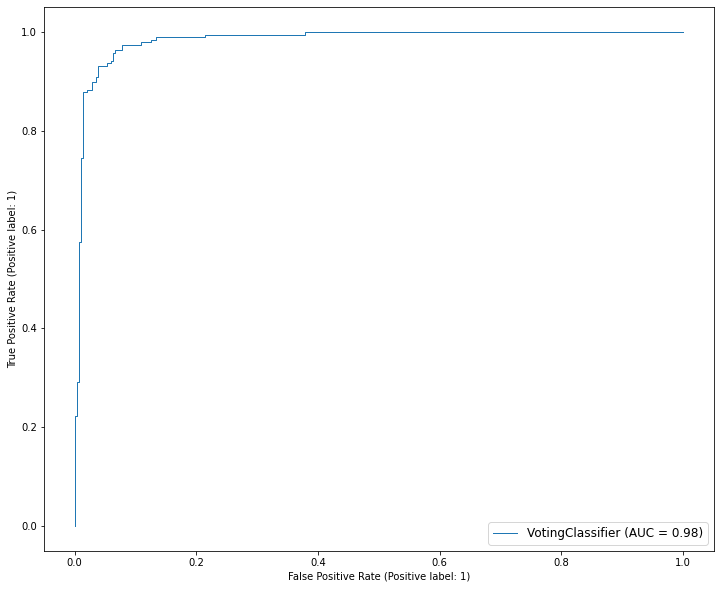

In [37]:
from sklearn.metrics import roc_curve, auc, plot_roc_curve
import matplotlib.pyplot as plt

# fpr, tpr, thersholds = roc_curve(y_test_tf, y_pred, pos_label=2)
# roc_auc = auc(fpr, tpr)

# plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
# plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
# plt.ylim([-0.05, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')  # 可以使用中文，但需要导入一些库即字体
# plt.title('ROC Curve')
# plt.legend(loc="lower right")
# plt.show()


fig,ax = plt.subplots(figsize=(12,10))
lr_roc = plot_roc_curve(estimator=vote, X=X_test_tf, 
                        y=y_test_tf, ax=ax, linewidth=1)
#注意:这里的ax一定要传给所创建画布的ax,否则三个模型的ROC曲线分别绘制三张图而不在一张图中
#更改图例字体大小
ax.legend(fontsize=12)

#显示绘制的ROC曲线
plt.show()

1

In [13]:
import joblib

model = joblib.load('movie_website.pkl')
tfidf = joblib.load('tf-idf.pkl')

model.score(X_test_tf, y_test_tf)

D:\latefallsapp\Anaconda\envs\d2l\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


0.9661733615221987

In [25]:
import pymysql
from SiteClassify import predict_url

db = pymysql.connect(
    host='1.15.220.155',
    user='test',
    password='991125',
    database='spider',
    charset='utf8'
)

c = db.cursor()

c.execute('select distinct(url) from sites where isPMS is NULL')

result = c.fetchall()

result = [i[0] for i in result]
movie = 0
non_movie = 0
for index, url in enumerate(result, 1):
    out = predict_url(url, model, tfidf)
    if out == 0:
        non_movie += 1
    elif out == 1:
        movie += 1
    c2 = db.cursor()
    sql = 'update sites set isPMS = %s  where url = %s'
    data = (out, url)
    c2.execute(sql, data)
    db.commit()
    if index % 50 == 0:
        print(' judge {} websites. {} movie sites, {} not movie sites, {} cant requests.'.format(index, movie, non_movie, 50-movie-non_movie))
        movie = 0
        non_movie = 0

OperationalError: (2013, 'Lost connection to MySQL server during query ([WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。)')

In [ ]:
import joblib

model = joblib.load('movie_website.pkl')
tfidf = joblib.load('tf-idf.pkl')


result = predict_file(file_path, model, tfidf)